In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import sqlite3

In [2]:
#connecting database connection
conn = sqlite3.connect('inventory.db')

In [3]:
tables = pd.read_sql_query("SELECT name from sqlite_master WHERE type = 'table'",conn)
tables

,name
0,begin_inventory
1,end_inventory
2,purchases
3,purchase_prices
4,sales
5,vendor_invoice
6,Vendor_Sales_Summary


In [4]:
print(tables.head())


              name
0  begin_inventory
1    end_inventory
2        purchases
3  purchase_prices
4            sales


In [5]:
for table in tables['name']:
    print('-' * 50, f'{table}', '-' * 50)
    print('count of records:',pd.read_sql(f"SELECT count(*) as count from {table}",conn)['count'].values[0])
    display(pd.read_sql(f"select * from {table} limit 5",conn))

-------------------------------------------------- begin_inventory --------------------------------------------------
count of records: 206529


,InventoryId,Store,City,Brand,Description,Size,onHand,Price,startDate
0,1_HARDERSFIELD_58,1,HARDERSFIELD,58,Gekkeikan Black & Gold Sake,750mL,8,12.99,2024-01-01
1,1_HARDERSFIELD_60,1,HARDERSFIELD,60,Canadian Club 1858 VAP,750mL,7,10.99,2024-01-01
2,1_HARDERSFIELD_62,1,HARDERSFIELD,62,Herradura Silver Tequila,750mL,6,36.99,2024-01-01
3,1_HARDERSFIELD_63,1,HARDERSFIELD,63,Herradura Reposado Tequila,750mL,3,38.99,2024-01-01
4,1_HARDERSFIELD_72,1,HARDERSFIELD,72,No. 3 London Dry Gin,750mL,6,34.99,2024-01-01


-------------------------------------------------- end_inventory --------------------------------------------------
count of records: 224489


,InventoryId,Store,City,Brand,Description,Size,onHand,Price,endDate
0,1_HARDERSFIELD_58,1,HARDERSFIELD,58,Gekkeikan Black & Gold Sake,750mL,11,12.99,2024-12-31
1,1_HARDERSFIELD_62,1,HARDERSFIELD,62,Herradura Silver Tequila,750mL,7,36.99,2024-12-31
2,1_HARDERSFIELD_63,1,HARDERSFIELD,63,Herradura Reposado Tequila,750mL,7,38.99,2024-12-31
3,1_HARDERSFIELD_72,1,HARDERSFIELD,72,No. 3 London Dry Gin,750mL,4,34.99,2024-12-31
4,1_HARDERSFIELD_75,1,HARDERSFIELD,75,Three Olives Tomato Vodka,750mL,7,14.99,2024-12-31


-------------------------------------------------- purchases --------------------------------------------------
count of records: 2372474


,InventoryId,Store,Brand,Description,Size,VendorNumber,VendorName,PONumber,PODate,ReceivingDate,InvoiceDate,PayDate,PurchasePrice,Quantity,Dollars,Classification
0,69_MOUNTMEND_8412,69,8412,Tequila Ocho Plata Fresno,750mL,105,ALTAMAR BRANDS LLC,8124,2023-12-21,2024-01-02,2024-01-04,2024-02-16,35.71,6,214.26,1
1,30_CULCHETH_5255,30,5255,TGI Fridays Ultimte Mudslide,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2023-12-22,2024-01-01,2024-01-07,2024-02-21,9.35,4,37.40,1
2,34_PITMERDEN_5215,34,5215,TGI Fridays Long Island Iced,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2023-12-22,2024-01-02,2024-01-07,2024-02-21,9.41,5,47.05,1
3,1_HARDERSFIELD_5255,1,5255,TGI Fridays Ultimte Mudslide,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2023-12-22,2024-01-01,2024-01-07,2024-02-21,9.35,6,56.10,1
4,76_DONCASTER_2034,76,2034,Glendalough Double Barrel,750mL,388,ATLANTIC IMPORTING COMPANY,8169,2023-12-24,2024-01-02,2024-01-09,2024-02-16,21.32,5,106.60,1


-------------------------------------------------- purchase_prices --------------------------------------------------
count of records: 12261


,Brand,Description,Price,Size,Volume,Classification,PurchasePrice,VendorNumber,VendorName
0,58,Gekkeikan Black & Gold Sake,12.99,750mL,750,1,9.28,8320,SHAW ROSS INT L IMP LTD
1,62,Herradura Silver Tequila,36.99,750mL,750,1,28.67,1128,BROWN-FORMAN CORP
2,63,Herradura Reposado Tequila,38.99,750mL,750,1,30.46,1128,BROWN-FORMAN CORP
3,72,No. 3 London Dry Gin,34.99,750mL,750,1,26.11,9165,ULTRA BEVERAGE COMPANY LLP
4,75,Three Olives Tomato Vodka,14.99,750mL,750,1,10.94,7245,PROXIMO SPIRITS INC.


-------------------------------------------------- sales --------------------------------------------------
count of records: 12825363


,InventoryId,Store,Brand,Description,Size,SalesQuantity,SalesDollars,SalesPrice,SalesDate,Volume,Classification,ExciseTax,VendorNo,VendorName
0,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,16.49,16.49,2024-01-01,750.0,1,0.79,12546,JIM BEAM BRANDS COMPANY
1,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,2,32.98,16.49,2024-01-02,750.0,1,1.57,12546,JIM BEAM BRANDS COMPANY
2,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,16.49,16.49,2024-01-03,750.0,1,0.79,12546,JIM BEAM BRANDS COMPANY
3,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,14.49,14.49,2024-01-08,750.0,1,0.79,12546,JIM BEAM BRANDS COMPANY
4,1_HARDERSFIELD_1005,1,1005,Maker's Mark Combo Pack,375mL 2 Pk,2,69.98,34.99,2024-01-09,375.0,1,0.79,12546,JIM BEAM BRANDS COMPANY


-------------------------------------------------- vendor_invoice --------------------------------------------------
count of records: 5543


,VendorNumber,VendorName,InvoiceDate,PONumber,PODate,PayDate,Quantity,Dollars,Freight,Approval
0,105,ALTAMAR BRANDS LLC,2024-01-04,8124,2023-12-21,2024-02-16,6,214.26,3.47,None
1,4466,AMERICAN VINTAGE BEVERAGE,2024-01-07,8137,2023-12-22,2024-02-21,15,140.55,8.57,None
2,388,ATLANTIC IMPORTING COMPANY,2024-01-09,8169,2023-12-24,2024-02-16,5,106.60,4.61,None
3,480,BACARDI USA INC,2024-01-12,8106,2023-12-20,2024-02-05,10100,137483.78,2935.20,None
4,516,BANFI PRODUCTS CORP,2024-01-07,8170,2023-12-24,2024-02-12,1935,15527.25,429.20,None


-------------------------------------------------- Vendor_Sales_Summary --------------------------------------------------
count of records: 10692


,VendorNumber,VendorName,Brand,Description,PurchasePrice,volume,ActualPrice,totalpurchasequantity,totalpurchasedollars,totalsalesquantity,totalsalesdollars,totalsalesprice,totalexcisetax,freightcost,GrossProfit,ProfitMargin,StockTurnOver,SalesPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,1750.0,36.99,145080,3811251.60,142049.0,5101919.51,672819.31,260999.20,68601.68,1290667.91,25.297693,0.979108,1.338647
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,1750.0,28.99,164038,3804041.22,160247.0,4819073.49,561512.37,294438.66,144929.24,1015032.27,21.062810,0.976890,1.266830
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,1750.0,24.99,187407,3418303.68,187140.0,4538120.60,461140.15,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,1750.0,22.99,201682,3261197.94,200412.0,4475972.88,420050.01,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,1750.0,29.99,138109,3023206.01,135838.0,4223107.62,545778.28,249587.83,257032.07,1199901.61,28.412764,0.983556,1.396897


In [6]:
purchases = pd.read_sql_query("select * from purchases where VendorNumber = 4466",conn)
purchases

,InventoryId,Store,Brand,Description,Size,VendorNumber,VendorName,PONumber,PODate,ReceivingDate,InvoiceDate,PayDate,PurchasePrice,Quantity,Dollars,Classification
0,30_CULCHETH_5255,30,5255,TGI Fridays Ultimte Mudslide,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2023-12-22,2024-01-01,2024-01-07,2024-02-21,9.35,4,37.40,1
1,34_PITMERDEN_5215,34,5215,TGI Fridays Long Island Iced,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2023-12-22,2024-01-02,2024-01-07,2024-02-21,9.41,5,47.05,1
2,1_HARDERSFIELD_5255,1,5255,TGI Fridays Ultimte Mudslide,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2023-12-22,2024-01-01,2024-01-07,2024-02-21,9.35,6,56.10,1
3,38_GOULCREST_5215,38,5215,TGI Fridays Long Island Iced,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8207,2023-12-27,2024-01-07,2024-01-19,2024-02-26,9.41,6,56.46,1
4,59_CLAETHORPES_5215,59,5215,TGI Fridays Long Island Iced,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8207,2023-12-27,2024-01-05,2024-01-19,2024-02-26,9.41,6,56.46,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2187,81_PEMBROKE_5215,81,5215,TGI Fridays Long Island Iced,1.75L,4466,AMERICAN VINTAGE BEVERAGE,13595,2024-12-20,2024-12-29,2025-01-04,2025-02-10,9.41,6,56.46,1
2188,62_KILMARNOCK_5255,62,5255,TGI Fridays Ultimte Mudslide,1.75L,4466,AMERICAN VINTAGE BEVERAGE,13595,2024-12-20,2024-12-28,2025-01-04,2025-02-10,9.35,5,46.75,1
2189,34_PITMERDEN_5215,34,5215,TGI Fridays Long Island Iced,1.75L,4466,AMERICAN VINTAGE BEVERAGE,13595,2024-12-20,2024-12-28,2025-01-04,2025-02-10,9.41,5,47.05,1
2190,6_GOULCREST_5215,6,5215,TGI Fridays Long Island Iced,1.75L,4466,AMERICAN VINTAGE BEVERAGE,13595,2024-12-20,2024-12-31,2025-01-04,2025-02-10,9.41,6,56.46,1


In [7]:
purchase_prices = pd.read_sql_query("select * from purchase_prices where VendorNumber = 4466",conn)
purchase_prices

,Brand,Description,Price,Size,Volume,Classification,PurchasePrice,VendorNumber,VendorName
0,5215,TGI Fridays Long Island Iced,12.99,1750mL,1750,1,9.41,4466,AMERICAN VINTAGE BEVERAGE
1,5255,TGI Fridays Ultimte Mudslide,12.99,1750mL,1750,1,9.35,4466,AMERICAN VINTAGE BEVERAGE
2,3140,TGI Fridays Orange Dream,14.99,1750mL,1750,1,11.19,4466,AMERICAN VINTAGE BEVERAGE


In [8]:
vendor_invoice = pd.read_sql_query("select * from vendor_invoice where VendorNumber = 4466",conn)
vendor_invoice

,VendorNumber,VendorName,InvoiceDate,PONumber,PODate,PayDate,Quantity,Dollars,Freight,Approval
0,4466,AMERICAN VINTAGE BEVERAGE,2024-01-07,8137,2023-12-22,2024-02-21,15,140.55,8.57,None
1,4466,AMERICAN VINTAGE BEVERAGE,2024-01-19,8207,2023-12-27,2024-02-26,335,3142.33,16.97,None
2,4466,AMERICAN VINTAGE BEVERAGE,2024-01-18,8307,2024-01-03,2024-02-18,41,383.35,1.99,None
3,4466,AMERICAN VINTAGE BEVERAGE,2024-01-27,8469,2024-01-14,2024-03-11,72,673.20,3.30,None
4,4466,AMERICAN VINTAGE BEVERAGE,2024-02-04,8532,2024-01-19,2024-03-15,79,740.21,3.48,None
5,4466,AMERICAN VINTAGE BEVERAGE,2024-02-09,8604,2024-01-24,2024-03-15,347,3261.37,17.61,None
6,4466,AMERICAN VINTAGE BEVERAGE,2024-02-17,8793,2024-02-05,2024-04-02,72,675.36,3.17,None
7,4466,AMERICAN VINTAGE BEVERAGE,2024-03-01,8892,2024-02-12,2024-03-28,117,1096.05,5.15,None
8,4466,AMERICAN VINTAGE BEVERAGE,2024-03-07,8995,2024-02-19,2024-04-02,129,1209.27,5.44,None
9,4466,AMERICAN VINTAGE BEVERAGE,2024-03-12,9033,2024-02-22,2024-04-16,147,1377.87,6.61,None


In [9]:
sales  = pd.read_sql_query("select * from sales where VendorNo = 4466",conn)
sales

,InventoryId,Store,Brand,Description,Size,SalesQuantity,SalesDollars,SalesPrice,SalesDate,Volume,Classification,ExciseTax,VendorNo,VendorName
0,1_HARDERSFIELD_5215,1,5215,TGI Fridays Long Island Iced,1.75L,1,12.99,12.99,2024-01-09,1750.0,1,1.84,4466,AMERICAN VINTAGE BEVERAGE
1,1_HARDERSFIELD_5215,1,5215,TGI Fridays Long Island Iced,1.75L,1,12.99,12.99,2024-01-12,1750.0,1,1.84,4466,AMERICAN VINTAGE BEVERAGE
2,1_HARDERSFIELD_5215,1,5215,TGI Fridays Long Island Iced,1.75L,1,12.99,12.99,2024-01-15,1750.0,1,1.84,4466,AMERICAN VINTAGE BEVERAGE
3,1_HARDERSFIELD_5215,1,5215,TGI Fridays Long Island Iced,1.75L,1,12.99,12.99,2024-01-21,1750.0,1,1.84,4466,AMERICAN VINTAGE BEVERAGE
4,1_HARDERSFIELD_5215,1,5215,TGI Fridays Long Island Iced,1.75L,1,12.99,12.99,2024-01-23,1750.0,1,1.84,4466,AMERICAN VINTAGE BEVERAGE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9448,9_BLACKPOOL_5215,9,5215,TGI Fridays Long Island Iced,1.75L,1,12.99,12.99,2024-12-21,1750.0,1,1.84,4466,AMERICAN VINTAGE BEVERAGE
9449,9_BLACKPOOL_5255,9,5255,TGI Fridays Ultimte Mudslide,1.75L,1,12.99,12.99,2024-12-02,1750.0,1,1.84,4466,AMERICAN VINTAGE BEVERAGE
9450,9_BLACKPOOL_5255,9,5255,TGI Fridays Ultimte Mudslide,1.75L,1,12.99,12.99,2024-12-09,1750.0,1,1.84,4466,AMERICAN VINTAGE BEVERAGE
9451,9_BLACKPOOL_5255,9,5255,TGI Fridays Ultimte Mudslide,1.75L,1,12.99,12.99,2024-12-23,1750.0,1,1.84,4466,AMERICAN VINTAGE BEVERAGE


In [10]:
purchases.groupby(['Brand','PurchasePrice'])[['Quantity', 'Dollars']].sum()

,,Quantity,Dollars
Brand,PurchasePrice,,
3140,11.19,4640,51921.60
5215,9.41,4923,46325.43
5255,9.35,6215,58110.25


In [11]:
purchase_prices

,Brand,Description,Price,Size,Volume,Classification,PurchasePrice,VendorNumber,VendorName
0,5215,TGI Fridays Long Island Iced,12.99,1750mL,1750,1,9.41,4466,AMERICAN VINTAGE BEVERAGE
1,5255,TGI Fridays Ultimte Mudslide,12.99,1750mL,1750,1,9.35,4466,AMERICAN VINTAGE BEVERAGE
2,3140,TGI Fridays Orange Dream,14.99,1750mL,1750,1,11.19,4466,AMERICAN VINTAGE BEVERAGE


In [12]:
vendor_invoice['PONumber'].nunique()

55

In [13]:
sales.groupby('Brand')[['SalesDollars','SalesPrice','SalesQuantity']].sum()

,SalesDollars,SalesPrice,SalesQuantity
Brand,,,
3140,50531.10,30071.85,3890
5215,60416.49,41542.02,4651
5255,79187.04,51180.60,6096


In [14]:
freight_summary= pd.read_sql_query("""select VendorNumber,sum(freight) as freight_cost
from vendor_invoice
Group by VendorNumber""",conn)

In [15]:
freight_summary

,VendorNumber,freight_cost
0,2,27.08
1,54,0.48
2,60,367.52
3,105,62.39
4,200,6.19
...,...,...
121,98450,856.02
122,99166,130.09
123,172662,178.34
124,173357,202.50


In [16]:
pd.read_sql_query("""SELECT p.VendorNumber,p.VendorName,p.Brand,p.PurchasePrice,
pp.volume,pp.price as actual_price,
SUM(quantity) as totalpurchasequantity,
sum(p.dollars) as totalpurchasedollars
from purchases p 
JOIN purchase_prices pp
ON p.Brand = pp.Brand
WHERE p.PurchasePrice > 0
GROUP BY p.VendorNumber,p.VendorName, p.Brand
ORDER BY totalpurchasedollars""",conn)

,VendorNumber,VendorName,Brand,PurchasePrice,Volume,actual_price,totalpurchasequantity,totalpurchasedollars
0,7245,PROXIMO SPIRITS INC.,3065,0.71,50,0.99,1,0.71
1,3960,DIAGEO NORTH AMERICA INC,6127,1.47,200,1.99,1,1.47
2,3924,HEAVEN HILL DISTILLERIES,9123,0.74,50,0.99,2,1.48
3,8004,SAZERAC CO INC,5683,0.39,50,0.49,6,2.34
4,9815,WINE GROUP INC,8527,1.32,750,4.99,2,2.64
...,...,...,...,...,...,...,...,...
10687,3960,DIAGEO NORTH AMERICA INC,3545,21.89,1750,29.99,138109,3023206.01
10688,3960,DIAGEO NORTH AMERICA INC,4261,16.17,1750,22.99,201682,3261197.94
10689,17035,PERNOD RICARD USA,8068,18.24,1750,24.99,187407,3418303.68
10690,4425,MARTIGNETTI COMPANIES,3405,23.19,1750,28.99,164038,3804041.22


In [17]:
sales.columns

Index(['InventoryId', 'Store', 'Brand', 'Description', 'Size', 'SalesQuantity',
       'SalesDollars', 'SalesPrice', 'SalesDate', 'Volume', 'Classification',
       'ExciseTax', 'VendorNo', 'VendorName'],
      dtype='object')

In [18]:
pd.read_sql_query("""SELECT VendorNo,Brand,
SUM(SalesDollars) as totalsalesdollars,
SUM(SalesPrice) as totalsalesprice,
SUM(SalesQuantity) as totalsalesquantity,
SUM(ExciseTax) as totlexcisetax
from Sales
GROUP  BY VendorNo,Brand
ORDER BY totalsalesdollars""", conn)

,VendorNo,Brand,totalsalesdollars,totalsalesprice,totalsalesquantity,totlexcisetax
0,8004,5287,0.98,0.98,2,0.10
1,9206,2773,0.99,0.99,1,0.05
2,3252,3933,1.98,0.99,2,0.10
3,3924,9123,1.98,0.99,2,0.10
4,10050,3623,1.98,1.98,2,0.10
...,...,...,...,...,...,...
11267,3960,3545,4223107.62,545778.28,135838,249587.83
11268,3960,4261,4475972.88,420050.01,200412,368242.80
11269,17035,8068,4538120.60,461140.15,187140,343854.07
11270,4425,3405,4819073.49,561512.37,160247,294438.66


In [19]:
import time 
start = time.time()
Vendor_Sales_Summary = pd.read_sql_query(""" WITH FreightSummary AS (
SELECT VendorNumber,
SUM(Freight) AS freightcost 
from vendor_invoice
GROUP BY VendorNumber
),
PurchaseSummary AS (
SELECT p.VendorNumber,p.VendorName,p.Brand,p.Description,p.PurchasePrice,
pp.Price AS ActualPrice,pp.volume,
SUM(p.Quantity) AS totalpurchasequantity,
SUM(p.Dollars) AS totalpurchasedollars
FROM Purchases p
JOIN purchase_prices pp
ON p.Brand = pp.Brand
WHERE p.PurchasePrice > 0
GROUP BY p.VendorNumber,p.VendorName,p.Brand,p.Description,p.PurchasePrice,pp.Price,
pp.Volume
),

SalesSummary AS (
SELECT
VendorNo,Brand,
SUM(SalesPrice) AS totalsalesprice,
SUM(ExciseTax) AS totalexcisetax,
SUM(SalesQuantity) AS totalsalesquantity,
SUM(SalesDollars) as totalsalesdollars
FROM Sales
GROUP BY VendorNo, Brand
)
 
SELECT 
ps.VendorNumber,ps.VendorName,ps.Brand,ps.Description,ps.PurchasePrice,
ps.Volume,ps.ActualPrice,ps.totalpurchasequantity,ps.totalpurchasedollars,
ss.totalsalesquantity,ss.totalsalesdollars,ss.totalsalesprice,ss.totalexcisetax,
fs.freightcost
from PurchaseSummary ps
left join SalesSummary ss
ON ps.VendorNumber = ss.VendoRNo
AND ps.Brand = ss.Brand
left join FreightSummary fs
ON ps.VendorNumber = fs.VendorNumber
Order by ps.totalpurchasedollars DESC""",conn)
end = time.time()

In [20]:
Vendor_Sales_Summary

,VendorNumber,VendorName,Brand,Description,PurchasePrice,volume,ActualPrice,totalpurchasequantity,totalpurchasedollars,totalsalesquantity,totalsalesdollars,totalsalesprice,totalexcisetax,freightcost
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,1750,36.99,145080,3811251.60,142049.0,5101919.51,672819.31,260999.20,68601.68
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,1750,28.99,164038,3804041.22,160247.0,4819073.49,561512.37,294438.66,144929.24
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,1750,24.99,187407,3418303.68,187140.0,4538120.60,461140.15,343854.07,123780.22
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,1750,22.99,201682,3261197.94,200412.0,4475972.88,420050.01,368242.80,257032.07
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,1750,29.99,138109,3023206.01,135838.0,4223107.62,545778.28,249587.83,257032.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10687,9815,WINE GROUP INC,8527,Concannon Glen Ellen Wh Zin,1.32,750,4.99,2,2.64,5.0,15.95,10.96,0.55,27100.41
10688,8004,SAZERAC CO INC,5683,Dr McGillicuddy's Apple Pie,0.39,50,0.49,6,2.34,134.0,65.66,1.47,7.04,50293.62
10689,3924,HEAVEN HILL DISTILLERIES,9123,Deep Eddy Vodka,0.74,50,0.99,2,1.48,2.0,1.98,0.99,0.10,14069.87
10690,3960,DIAGEO NORTH AMERICA INC,6127,The Club Strawbry Margarita,1.47,200,1.99,1,1.47,72.0,143.28,77.61,15.12,257032.07


In [21]:
print(end-start)

41.13623023033142


In [22]:
Vendor_Sales_Summary.dtypes

VendorNumber               int64
VendorName                object
Brand                      int64
Description               object
PurchasePrice            float64
volume                    object
ActualPrice              float64
totalpurchasequantity      int64
totalpurchasedollars     float64
totalsalesquantity       float64
totalsalesdollars        float64
totalsalesprice          float64
totalexcisetax           float64
freightcost              float64
dtype: object

In [23]:
Vendor_Sales_Summary.isnull().sum()

VendorNumber               0
VendorName                 0
Brand                      0
Description                0
PurchasePrice              0
volume                     0
ActualPrice                0
totalpurchasequantity      0
totalpurchasedollars       0
totalsalesquantity       178
totalsalesdollars        178
totalsalesprice          178
totalexcisetax           178
freightcost                0
dtype: int64

In [24]:
Vendor_Sales_Summary.head()

,VendorNumber,VendorName,Brand,Description,PurchasePrice,volume,ActualPrice,totalpurchasequantity,totalpurchasedollars,totalsalesquantity,totalsalesdollars,totalsalesprice,totalexcisetax,freightcost
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,1750,36.99,145080,3811251.60,142049.0,5101919.51,672819.31,260999.20,68601.68
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,1750,28.99,164038,3804041.22,160247.0,4819073.49,561512.37,294438.66,144929.24
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,1750,24.99,187407,3418303.68,187140.0,4538120.60,461140.15,343854.07,123780.22
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,1750,22.99,201682,3261197.94,200412.0,4475972.88,420050.01,368242.80,257032.07
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,1750,29.99,138109,3023206.01,135838.0,4223107.62,545778.28,249587.83,257032.07


In [25]:
Vendor_Sales_Summary['volume'] = Vendor_Sales_Summary['volume'].astype('float64')

In [26]:
Vendor_Sales_Summary.fillna(0,inplace= True)

In [27]:
Vendor_Sales_Summary['VendorName'] = Vendor_Sales_Summary['VendorName'].str.strip()

In [28]:
Vendor_Sales_Summary.isnull().sum()

VendorNumber             0
VendorName               0
Brand                    0
Description              0
PurchasePrice            0
volume                   0
ActualPrice              0
totalpurchasequantity    0
totalpurchasedollars     0
totalsalesquantity       0
totalsalesdollars        0
totalsalesprice          0
totalexcisetax           0
freightcost              0
dtype: int64

In [29]:
Vendor_Sales_Summary['VendorName'].unique()

array(['BROWN-FORMAN CORP', 'MARTIGNETTI COMPANIES', 'PERNOD RICARD USA',
       'DIAGEO NORTH AMERICA INC', 'BACARDI USA INC',
       'JIM BEAM BRANDS COMPANY', 'MAJESTIC FINE WINES',
       'ULTRA BEVERAGE COMPANY LLP', 'STOLI GROUP,(USA) LLC',
       'PROXIMO SPIRITS INC.', 'MOET HENNESSY USA INC', 'CAMPARI AMERICA',
       'SAZERAC CO INC', 'CONSTELLATION BRANDS INC', 'M S WALKER INC',
       'SAZERAC NORTH AMERICA INC.', 'PALM BAY INTERNATIONAL INC',
       'REMY COINTREAU USA INC', 'SIDNEY FRANK IMPORTING CO',
       'E & J GALLO WINERY', 'WILLIAM GRANT & SONS INC',
       'HEAVEN HILL DISTILLERIES', 'DISARONNO INTERNATIONAL LLC',
       'EDRINGTON AMERICAS', 'CASTLE BRANDS CORP.',
       'SOUTHERN WINE & SPIRITS NE', 'STE MICHELLE WINE ESTATES',
       'TRINCHERO FAMILY ESTATES', 'MHW LTD', 'WINE GROUP INC',
       'PERFECTA WINES', 'LUXCO INC', 'TREASURY WINE ESTATES',
       'DIAGEO CHATEAU ESTATE WINES', 'SHAW ROSS INT L IMP LTD',
       'PINE STATE TRADING CO', 'PHILLIPS PRO

In [30]:
Vendor_Sales_Summary.dtypes

VendorNumber               int64
VendorName                object
Brand                      int64
Description               object
PurchasePrice            float64
volume                   float64
ActualPrice              float64
totalpurchasequantity      int64
totalpurchasedollars     float64
totalsalesquantity       float64
totalsalesdollars        float64
totalsalesprice          float64
totalexcisetax           float64
freightcost              float64
dtype: object

In [31]:
Vendor_Sales_Summary['GrossProfit'] = Vendor_Sales_Summary['totalsalesdollars']- Vendor_Sales_Summary['totalpurchasedollars']

In [32]:
Vendor_Sales_Summary['GrossProfit'] 

0        1290667.91
1        1015032.27
2        1119816.92
3        1214774.94
4        1199901.61
            ...    
10687         13.31
10688         63.32
10689          0.50
10690        141.81
10691         84.43
Name: GrossProfit, Length: 10692, dtype: float64

In [33]:
Vendor_Sales_Summary['GrossProfit'].min()

-52002.780000000006

In [34]:
Vendor_Sales_Summary['ProfitMargin'] = (Vendor_Sales_Summary['GrossProfit']/Vendor_Sales_Summary['totalsalesdollars'])*100   

In [35]:
Vendor_Sales_Summary['StockTurnOver'] = Vendor_Sales_Summary['totalsalesquantity']/Vendor_Sales_Summary['totalpurchasequantity']   

In [36]:
Vendor_Sales_Summary['SalesPurchaseRatio'] = Vendor_Sales_Summary['totalsalesdollars']/Vendor_Sales_Summary['totalpurchasedollars']  

In [37]:
cursor = conn.cursor()

In [38]:
Vendor_Sales_Summary.columns

Index(['VendorNumber', 'VendorName', 'Brand', 'Description', 'PurchasePrice',
       'volume', 'ActualPrice', 'totalpurchasequantity',
       'totalpurchasedollars', 'totalsalesquantity', 'totalsalesdollars',
       'totalsalesprice', 'totalexcisetax', 'freightcost', 'GrossProfit',
       'ProfitMargin', 'StockTurnOver', 'SalesPurchaseRatio'],
      dtype='object')

In [39]:
conn.execute("DROP TABLE IF EXISTS Vendor_Sales_Summary")
conn.commit()

In [40]:
cursor.execute("""CREATE TABLE Vendor_Sales_Summary(
    VendorNumber INT,
    VendorName VARCHAR(100), 
    Brand INT, 
    Description VARCHAR(100),
    PurchasePrice DECIMAL(10,2),
    volume , 
    ActualPrice DECIMAL(15,2), 
    totalpurchasequantity INT,
    totalpurchasedollars DECIMAL(15,2), 
    totalsalesquantity INT, 
    totalsalesdollars DECIMAL(15,2),
    totalsalesprice DECIMAL(15,2), 
    totalexcisetax DECIMAL(15,2), 
    freightcost DECIMAL(15,2),
    GrossProfit DECIMAL(15,2),
    ProfitMargin DECIMAL(15,2),
    stockTurnOver DECIMAL(15,2),
    SalesPurchaseRatio DECIMAL(15,2),
    PRIMARY KEY(VendorNumber,Brand)
);
""")
    

In [41]:
pd.read_sql_query("SELECT * FROM Vendor_Sales_Summary ",conn)

,VendorNumber,VendorName,Brand,Description,PurchasePrice,volume,ActualPrice,totalpurchasequantity,totalpurchasedollars,totalsalesquantity,totalsalesdollars,totalsalesprice,totalexcisetax,freightcost,GrossProfit,ProfitMargin,stockTurnOver,SalesPurchaseRatio


In [42]:
Vendor_Sales_Summary.to_sql('Vendor_Sales_Summary',conn, if_exists='replace',index = False)

10692

In [43]:
pd.read_sql_query("SELECT * FROM Vendor_Sales_Summary ",conn)

,VendorNumber,VendorName,Brand,Description,PurchasePrice,volume,ActualPrice,totalpurchasequantity,totalpurchasedollars,totalsalesquantity,totalsalesdollars,totalsalesprice,totalexcisetax,freightcost,GrossProfit,ProfitMargin,StockTurnOver,SalesPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,1750.0,36.99,145080,3811251.60,142049.0,5101919.51,672819.31,260999.20,68601.68,1290667.91,25.297693,0.979108,1.338647
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,1750.0,28.99,164038,3804041.22,160247.0,4819073.49,561512.37,294438.66,144929.24,1015032.27,21.062810,0.976890,1.266830
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,1750.0,24.99,187407,3418303.68,187140.0,4538120.60,461140.15,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,1750.0,22.99,201682,3261197.94,200412.0,4475972.88,420050.01,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,1750.0,29.99,138109,3023206.01,135838.0,4223107.62,545778.28,249587.83,257032.07,1199901.61,28.412764,0.983556,1.396897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10687,9815,WINE GROUP INC,8527,Concannon Glen Ellen Wh Zin,1.32,750.0,4.99,2,2.64,5.0,15.95,10.96,0.55,27100.41,13.31,83.448276,2.500000,6.041667
10688,8004,SAZERAC CO INC,5683,Dr McGillicuddy's Apple Pie,0.39,50.0,0.49,6,2.34,134.0,65.66,1.47,7.04,50293.62,63.32,96.436186,22.333333,28.059829
10689,3924,HEAVEN HILL DISTILLERIES,9123,Deep Eddy Vodka,0.74,50.0,0.99,2,1.48,2.0,1.98,0.99,0.10,14069.87,0.50,25.252525,1.000000,1.337838
10690,3960,DIAGEO NORTH AMERICA INC,6127,The Club Strawbry Margarita,1.47,200.0,1.99,1,1.47,72.0,143.28,77.61,15.12,257032.07,141.81,98.974037,72.000000,97.469388


# EDA

In [44]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
import sqlite3
from scipy.stats import ttest_ind
import scipy.stats as stats
warnings.filterwarnings('ignore')

In [45]:
# loading the dataset
conn = sqlite3.connect('inventory_db')

df = pd.read_sql_query("select * from Vendor_Sales_Summary",conn)
df.head()

,VendorNumber,VendorName,Brand,Description,PurchasePrice,volume,ActualPrice,totalpurchasequantity,totalpurchasedollars,totalsalesquantity,totalsalesdollars,totalsalesprice,totalexcisetax,freightcost,GrossProfit,ProfitMargin,StockTurnOver,SalesPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,1750.0,36.99,145080,3811251.60,142049.0,5101919.51,672819.31,260999.20,68601.68,1290667.91,25.297693,0.979108,1.338647
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,1750.0,28.99,164038,3804041.22,160247.0,4819073.49,561512.37,294438.66,144929.24,1015032.27,21.062810,0.976890,1.266830
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,1750.0,24.99,187407,3418303.68,187140.0,4538120.60,461140.15,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,1750.0,22.99,201682,3261197.94,200412.0,4475972.88,420050.01,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,1750.0,29.99,138109,3023206.01,135838.0,4223107.62,545778.28,249587.83,257032.07,1199901.61,28.412764,0.983556,1.396897


In [46]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
VendorNumber,10692.0,1.065065e+04,18753.519148,2.00,3951.000000,7153.000000,9552.000000,2.013590e+05
Brand,10692.0,1.803923e+04,12662.187074,58.00,5793.500000,18761.500000,25514.250000,9.063100e+04
PurchasePrice,10692.0,2.438530e+01,109.269375,0.36,6.840000,10.455000,19.482500,5.681810e+03
volume,10692.0,8.473605e+02,664.309212,50.00,750.000000,750.000000,750.000000,2.000000e+04
ActualPrice,10692.0,3.564367e+01,148.246016,0.49,10.990000,15.990000,28.990000,7.499990e+03
totalpurchasequantity,10692.0,3.140887e+03,11095.086769,1.00,36.000000,262.000000,1975.750000,3.376600e+05
totalpurchasedollars,10692.0,3.010669e+04,123067.799627,0.71,453.457500,3655.465000,20738.245000,3.811252e+06
totalsalesquantity,10692.0,3.077482e+03,10952.851391,0.00,33.000000,261.000000,1929.250000,3.349390e+05
totalsalesdollars,10692.0,4.223907e+04,167655.265984,0.00,729.220000,5298.045000,28396.915000,5.101920e+06
totalsalesprice,10692.0,1.879378e+04,44952.773386,0.00,289.710000,2857.800000,16059.562500,6.728193e+05


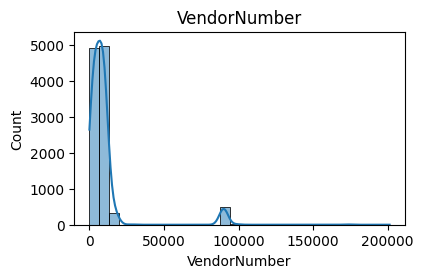

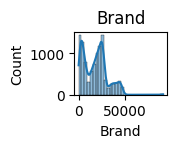

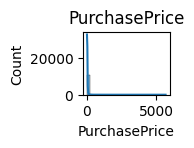

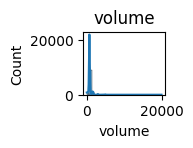

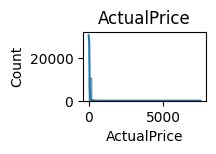

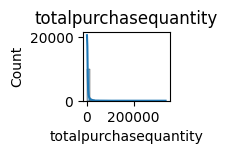

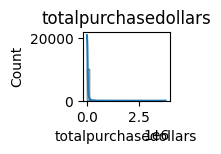

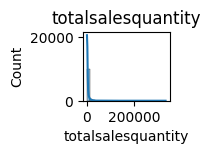

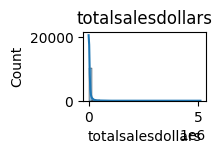

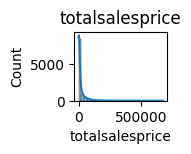

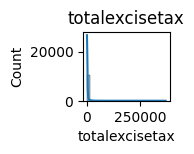

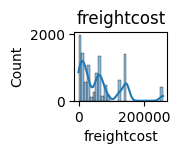

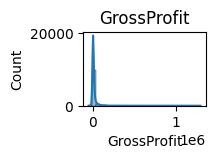

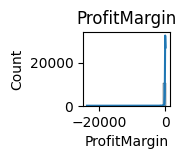

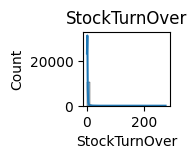

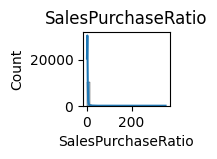

In [47]:
numerical_cols = df.select_dtypes(include = np.number).columns

plt.figure(figsize=(15,10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 4,i+1)
    sns.histplot(df[col], kde = True,bins = 30)
    plt.title(col)
    plt.tight_layout()
    plt.show()

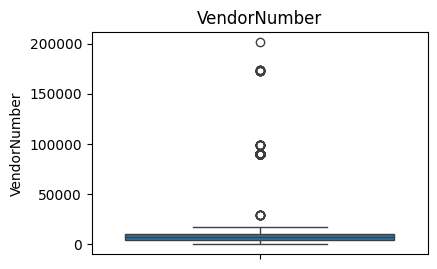

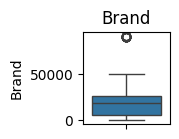

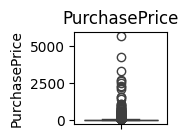

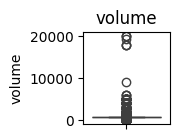

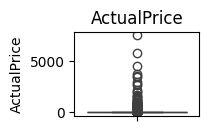

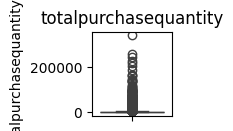

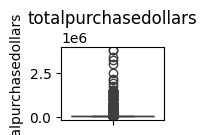

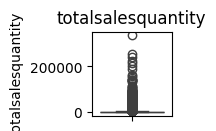

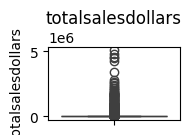

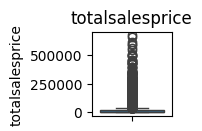

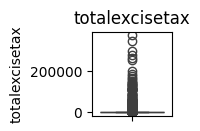

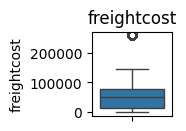

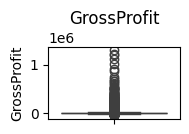

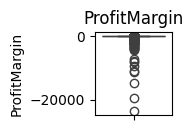

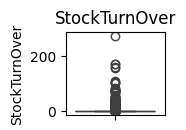

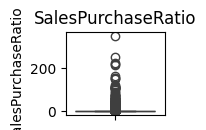

In [48]:
numerical_cols = df.select_dtypes(include = np.number).columns

plt.figure(figsize=(15,10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 4,i+1)
    sns.boxplot(y = df[col])
    plt.title(col)
    plt.tight_layout()
    plt.show()

In [49]:
# filter the the data by removing inconsistencies
df = pd.read_sql_query("""SELECT *
FROM Vendor_Sales_Summary
where GrossProfit>0
and ProfitMargin > 0 
AND totalsalesquantity > 0""",conn)

In [50]:
df

,VendorNumber,VendorName,Brand,Description,PurchasePrice,volume,ActualPrice,totalpurchasequantity,totalpurchasedollars,totalsalesquantity,totalsalesdollars,totalsalesprice,totalexcisetax,freightcost,GrossProfit,ProfitMargin,StockTurnOver,SalesPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,1750.0,36.99,145080,3811251.60,142049.0,5101919.51,672819.31,260999.20,68601.68,1290667.91,25.297693,0.979108,1.338647
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,1750.0,28.99,164038,3804041.22,160247.0,4819073.49,561512.37,294438.66,144929.24,1015032.27,21.062810,0.976890,1.266830
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,1750.0,24.99,187407,3418303.68,187140.0,4538120.60,461140.15,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,1750.0,22.99,201682,3261197.94,200412.0,4475972.88,420050.01,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,1750.0,29.99,138109,3023206.01,135838.0,4223107.62,545778.28,249587.83,257032.07,1199901.61,28.412764,0.983556,1.396897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8559,9815,WINE GROUP INC,8527,Concannon Glen Ellen Wh Zin,1.32,750.0,4.99,2,2.64,5.0,15.95,10.96,0.55,27100.41,13.31,83.448276,2.500000,6.041667
8560,8004,SAZERAC CO INC,5683,Dr McGillicuddy's Apple Pie,0.39,50.0,0.49,6,2.34,134.0,65.66,1.47,7.04,50293.62,63.32,96.436186,22.333333,28.059829
8561,3924,HEAVEN HILL DISTILLERIES,9123,Deep Eddy Vodka,0.74,50.0,0.99,2,1.48,2.0,1.98,0.99,0.10,14069.87,0.50,25.252525,1.000000,1.337838
8562,3960,DIAGEO NORTH AMERICA INC,6127,The Club Strawbry Margarita,1.47,200.0,1.99,1,1.47,72.0,143.28,77.61,15.12,257032.07,141.81,98.974037,72.000000,97.469388


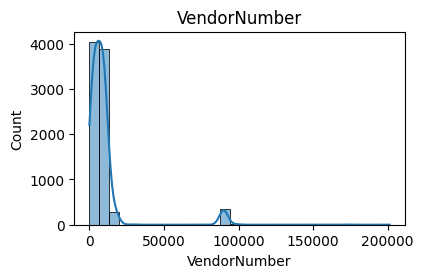

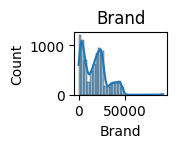

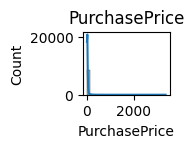

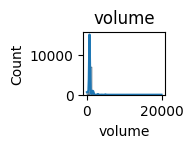

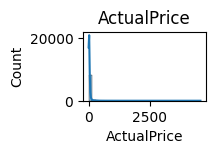

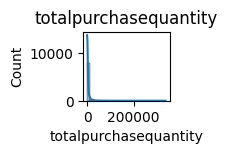

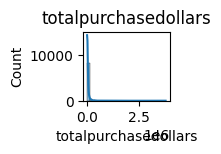

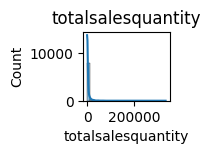

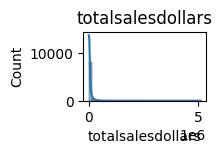

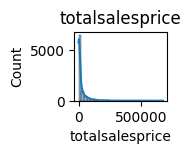

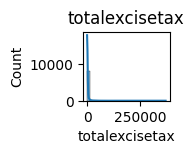

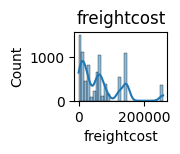

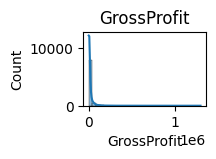

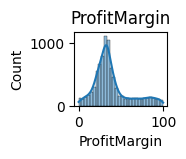

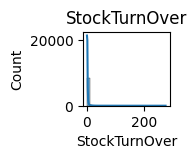

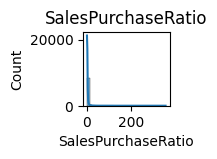

In [51]:
numerical_cols = df.select_dtypes(include = np.number).columns

plt.figure(figsize=(15,10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 4,i+1)
    sns.histplot(df[col], kde = True,bins = 30)
    plt.title(col)
    plt.tight_layout()
    plt.show()

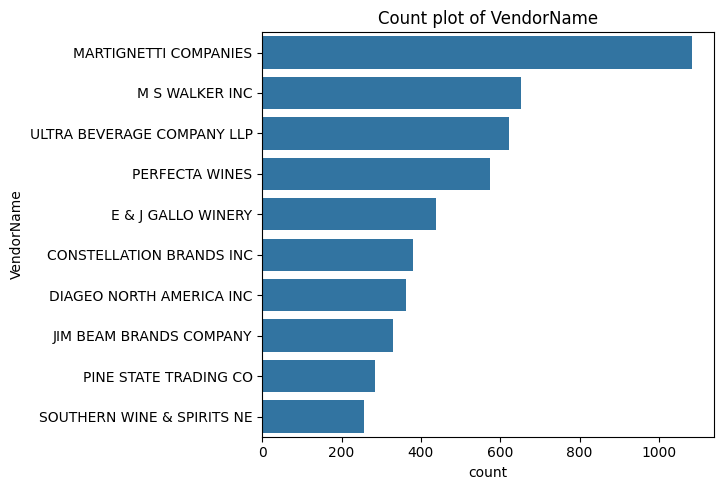

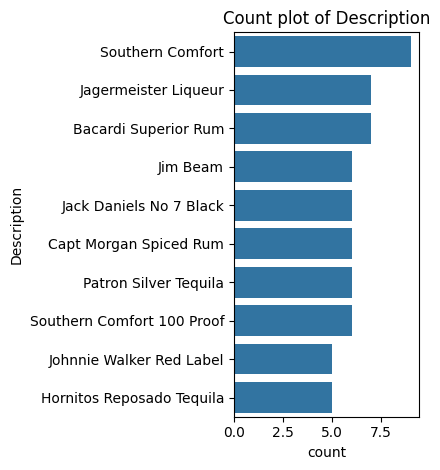

In [52]:
categorical_cols = ["VendorName","Description"]

plt.figure(figsize=(12,5))
for i, col in enumerate(categorical_cols):
    plt.subplot(1, 2,i+1)
    sns.countplot(y = df[col],order = df[col].value_counts().index[:10])
    plt.title(f"Count plot of {col}")
    plt.tight_layout()
    plt.show()

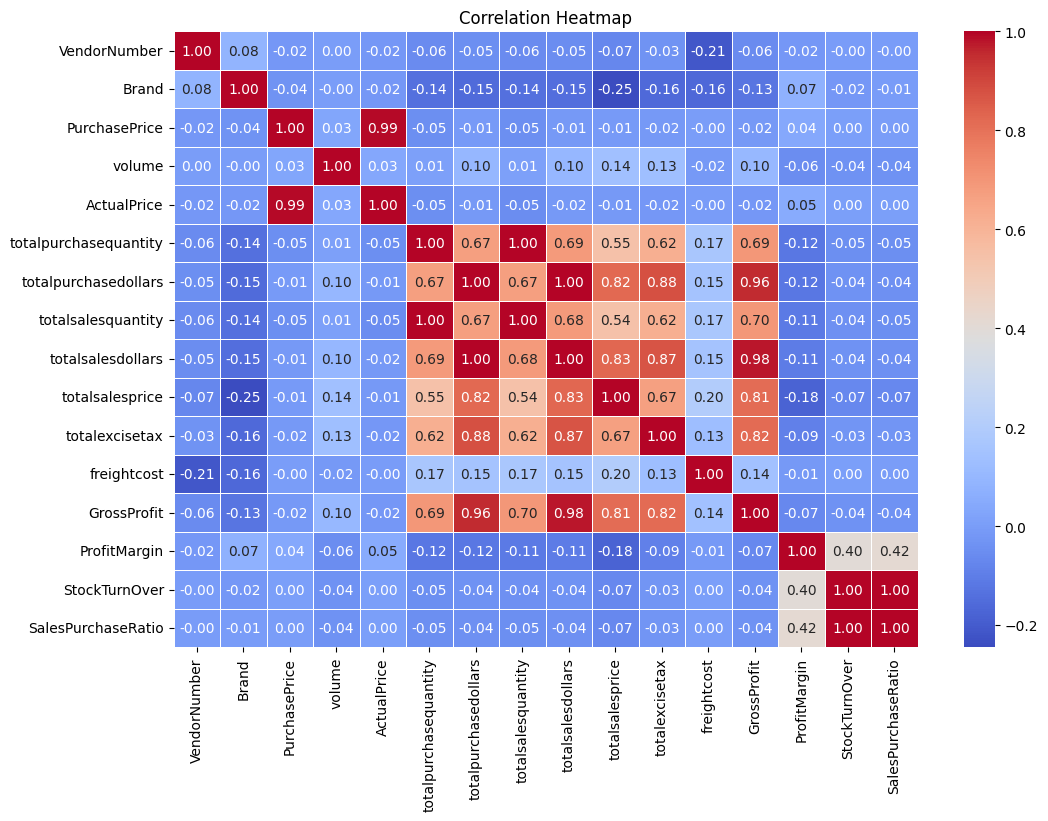

In [53]:
# correlation 
plt.figure(figsize=(12,8))
correlation_matrix = df[numerical_cols].corr()
sns.heatmap(correlation_matrix,annot = True,fmt=".2f",cmap="coolwarm",linewidth=0.5)
plt.title("Correlation Heatmap")
plt.show()

### Identify brands that needs promotional or pricing adjustments which exhibit lower sales performance but higher profit margins

In [54]:
brand_performance=df.groupby('Description').agg({
    'totalsalesdollars':"sum",
    'ProfitMargin':'mean'}).reset_index()


In [55]:
low_sales_threshold = brand_performance['totalsalesdollars'].quantile(0.15)
high_margin_threshold = brand_performance['ProfitMargin'].quantile(0.85)

In [110]:
low_sales_threshold

np.float64(560.299)

In [111]:
high_margin_threshold

np.float64(64.97017552750113)

In [112]:
# filter brands with sales low sales but high profit margins
target_brands = brand_performance[
    (brand_performance['totalsalesdollars']<=low_sales_threshold) &
    (brand_performance['ProfitMargin']>=high_margin_threshold)
    ]
print("Brands with low sales and high progit margin:")
display(target_brands.sort_values('totalsalesdollars'))

Brands with low sales and high progit margin:


,Description,totalsalesdollars,ProfitMargin
6199,Santa Rita Organic Svgn Bl,9.99,66.466466
2369,Debauchery Pnt Nr,11.58,65.975820
2070,Concannon Glen Ellen Wh Zin,15.95,83.448276
2188,Crown Royal Apple,27.86,89.806174
6237,Sauza Sprklg Wild Berry Marg,27.96,82.153076
...,...,...,...
5074,Nanbu Bijin Southern Beauty,535.68,76.747312
2271,Dad's Hat Rye Whiskey,538.89,81.851584
57,A Bichot Clos Marechaudes,539.94,67.740860
6245,Sbragia Home Ranch Merlot,549.75,66.444748


In [126]:
brand_performance = brand_performance[brand_performance['totalsalesdollars']<10000]

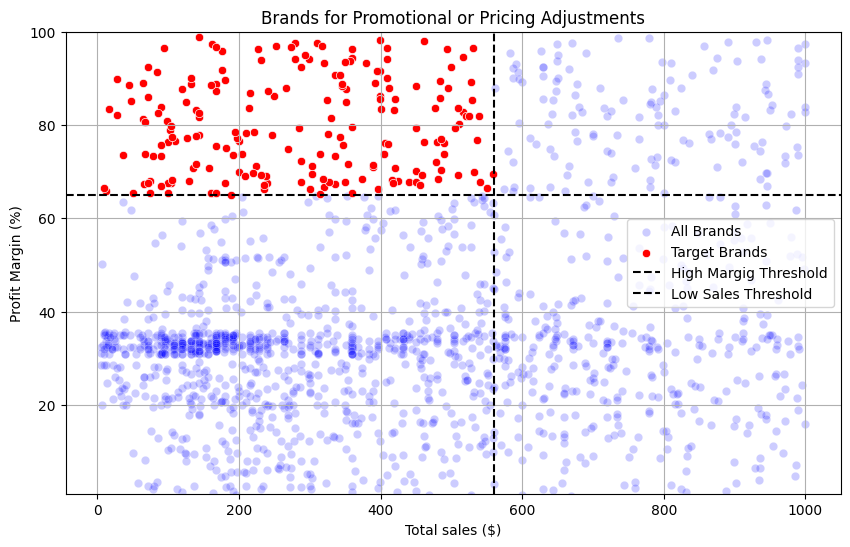

In [128]:
plt.figure(figsize = (10,6))
sns.scatterplot(data=brand_performance,x='totalsalesdollars',y='ProfitMargin',color='blue',label='All Brands',alpha=0.2)

sns.scatterplot(data = target_brands, x = 'totalsalesdollars', y= 'ProfitMargin', color = "red", label="Target Brands")

plt.axhline(high_margin_threshold, linestyle='--',color="black", label = "High Margig Threshold")
plt.axvline(low_sales_threshold, linestyle='--',color="black", label = "Low Sales Threshold")

plt.xlabel("Total sales ($)")
plt.ylabel("Profit Margin (%)")
plt.title("Brands for Promotional or Pricing Adjustments")
plt.legend()

plt.ylim(1, 100)
plt.grid(True)
plt.show()

### Which vendors and brands demonstrate the highest sales performance

In [169]:
def format_dollars(value):
    if value >= 1_000_000:
        return f"{value / 1_000_000:.2f}M"
    elif value>=1_000:
        return f"{value / 1_000:.2f}K"
    else:
        return str(value)
        

In [170]:
# Top vendors & brands by sales performance
top_vendors = df.groupby("VendorName")["totalsalesdollars"].sum().nlargest(10)
top_brands = df.groupby("Description")["totalsalesdollars"].sum().nlargest(10)
top_vendors

VendorName
DIAGEO NORTH AMERICA INC      67990099.42
MARTIGNETTI COMPANIES         39330359.36
PERNOD RICARD USA             32063196.19
JIM BEAM BRANDS COMPANY       31423020.46
BACARDI USA INC               24854817.14
CONSTELLATION BRANDS INC      24218745.65
E & J GALLO WINERY            18399899.46
BROWN-FORMAN CORP             18247230.65
ULTRA BEVERAGE COMPANY LLP    16502544.31
M S WALKER INC                14706458.51
Name: totalsalesdollars, dtype: float64

In [171]:
top_brands

Description
Jack Daniels No 7 Black    7964746.76
Tito's Handmade Vodka      7399657.58
Grey Goose Vodka           7209608.06
Capt Morgan Spiced Rum     6356320.62
Absolut 80 Proof           6244752.03
Jameson Irish Whiskey      5715759.69
Ketel One Vodka            5070083.56
Baileys Irish Cream        4150122.07
Kahlua                     3604858.66
Tanqueray                  3456697.90
Name: totalsalesdollars, dtype: float64

In [172]:
top_brands.apply(lambda x : format_dollars(x))

Description
Jack Daniels No 7 Black    7.96M
Tito's Handmade Vodka      7.40M
Grey Goose Vodka           7.21M
Capt Morgan Spiced Rum     6.36M
Absolut 80 Proof           6.24M
Jameson Irish Whiskey      5.72M
Ketel One Vodka            5.07M
Baileys Irish Cream        4.15M
Kahlua                     3.60M
Tanqueray                  3.46M
Name: totalsalesdollars, dtype: object

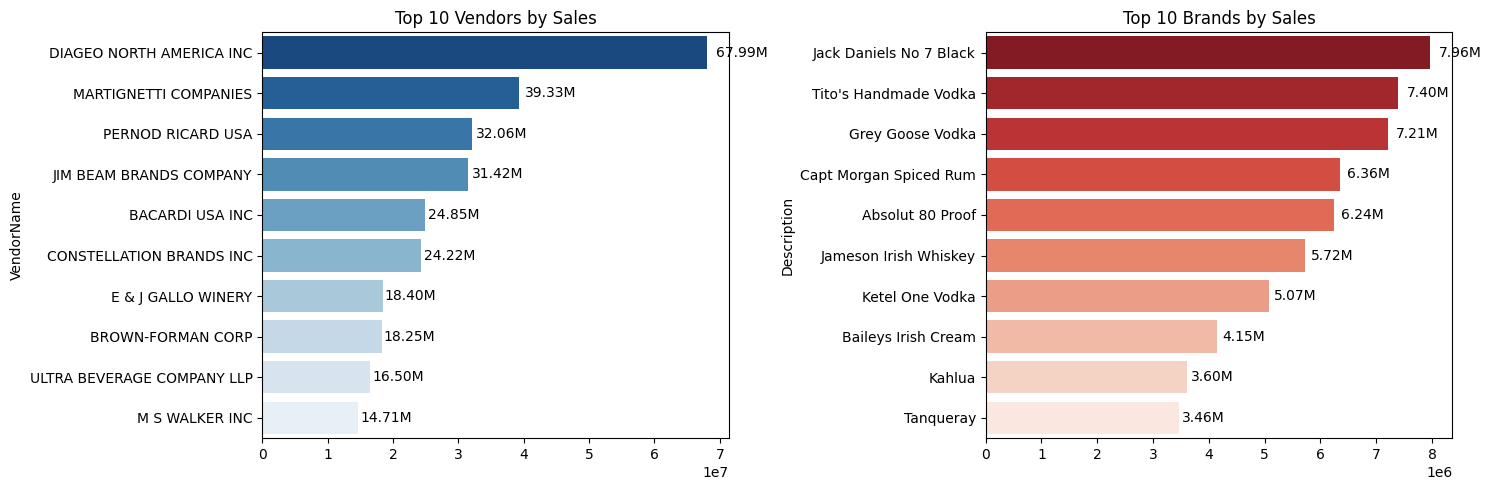

In [173]:
plt.figure(figsize=(15, 5))

#Plot for Top Vendors

plt.subplot(1, 2, 1)

ax1 = sns.barplot(y=top_vendors.index, x=top_vendors.values, palette = "Blues_r")
plt.title("Top 10 Vendors by Sales")

for bar in ax1.patches:
    ax1.text(bar.get_width() + (bar.get_width()*0.02), 
         bar.get_y() + bar.get_height() / 2, 
         format_dollars(bar.get_width()),
         ha='left', va='center', fontsize=10, color='black')

#Plot for Top Brands

plt.subplot(1, 2, 2)
ax2 = sns.barplot(y=top_brands.index.astype(str), x=top_brands.values, palette="Reds_r")
plt.title("Top 10 Brands by Sales")

for bar in ax2.patches:
    ax2.text(bar.get_width() + (bar.get_width()* 0.02),
             bar.get_y()+ bar.get_height() / 2,
             format_dollars(bar.get_width()), 
             ha='left', va='center', fontsize=10, color='black')

plt.tight_layout()
plt.show()

### Which vendors contribute the most to total purchase dollars?

In [174]:
vendor_performance = df.groupby('VendorName').agg({
    'totalpurchasedollars':'sum',
    'GrossProfit':'sum',
    'totalsalesdollars':'sum'
}).reset_index()

In [195]:
vendor_performance['purchasecontribution%'] = vendor_performance['totalpurchasedollars']/vendor_performance['totalpurchasedollars'].sum()*100

In [196]:
vendor_performance

,VendorName,totalpurchasedollars,GrossProfit,totalsalesdollars,purchasecontribution%
25,DIAGEO NORTH AMERICA INC,50097226.16,17892873.26,67990099.42,16.300345
57,MARTIGNETTI COMPANIES,25502095.83,13828263.53,39330359.36,8.297724
68,PERNOD RICARD USA,23851164.17,8212032.02,32063196.19,7.760554
46,JIM BEAM BRANDS COMPANY,23494304.32,7928716.14,31423020.46,7.644441
6,BACARDI USA INC,17432020.26,7422796.88,24854817.14,5.671930
...,...,...,...,...,...
33,FANTASY FINE WINES CORP,128.64,198.95,327.59,0.000042
107,UNCORKED,118.74,58.20,176.94,0.000039
85,SILVER MOUNTAIN CIDERS,77.18,265.33,342.51,0.000025
16,CAPSTONE INTERNATIONAL,54.64,192.23,246.87,0.000018


In [197]:
vendor_performance = round(vendor_performance.sort_values('purchasecontribution%',ascending = False),2)

In [198]:
# top 10 vendors
top_vendors = vendor_performance.head(10)
top_vendors['totalsalesdollars'] = top_vendors['totalsalesdollars'].apply(format_dollars) 
top_vendors['totalpurchasedollars'] = top_vendors['totalpurchasedollars'].apply(format_dollars) 
top_vendors['GrossProfit'] = top_vendors['GrossProfit'].apply(format_dollars)
top_vendors

,VendorName,totalpurchasedollars,GrossProfit,totalsalesdollars,purchasecontribution%
25,DIAGEO NORTH AMERICA INC,50.10M,17.89M,67.99M,16.30
57,MARTIGNETTI COMPANIES,25.50M,13.83M,39.33M,8.30
68,PERNOD RICARD USA,23.85M,8.21M,32.06M,7.76
46,JIM BEAM BRANDS COMPANY,23.49M,7.93M,31.42M,7.64
6,BACARDI USA INC,17.43M,7.42M,24.85M,5.67
20,CONSTELLATION BRANDS INC,15.27M,8.95M,24.22M,4.97
11,BROWN-FORMAN CORP,13.24M,5.01M,18.25M,4.31
30,E & J GALLO WINERY,12.07M,6.33M,18.40M,3.93
106,ULTRA BEVERAGE COMPANY LLP,11.17M,5.34M,16.50M,3.63
53,M S WALKER INC,9.76M,4.94M,14.71M,3.18


In [199]:
top_vendors['purchasecontribution%'].sum()

np.float64(65.69000000000001)

In [200]:
top_vendors['cumulativecontribution%'] = top_vendors['purchasecontribution%'].cumsum()
top_vendors

,VendorName,totalpurchasedollars,GrossProfit,totalsalesdollars,purchasecontribution%,cumulativecontribution%
25,DIAGEO NORTH AMERICA INC,50.10M,17.89M,67.99M,16.30,16.30
57,MARTIGNETTI COMPANIES,25.50M,13.83M,39.33M,8.30,24.60
68,PERNOD RICARD USA,23.85M,8.21M,32.06M,7.76,32.36
46,JIM BEAM BRANDS COMPANY,23.49M,7.93M,31.42M,7.64,40.00
6,BACARDI USA INC,17.43M,7.42M,24.85M,5.67,45.67
20,CONSTELLATION BRANDS INC,15.27M,8.95M,24.22M,4.97,50.64
11,BROWN-FORMAN CORP,13.24M,5.01M,18.25M,4.31,54.95
30,E & J GALLO WINERY,12.07M,6.33M,18.40M,3.93,58.88
106,ULTRA BEVERAGE COMPANY LLP,11.17M,5.34M,16.50M,3.63,62.51
53,M S WALKER INC,9.76M,4.94M,14.71M,3.18,65.69


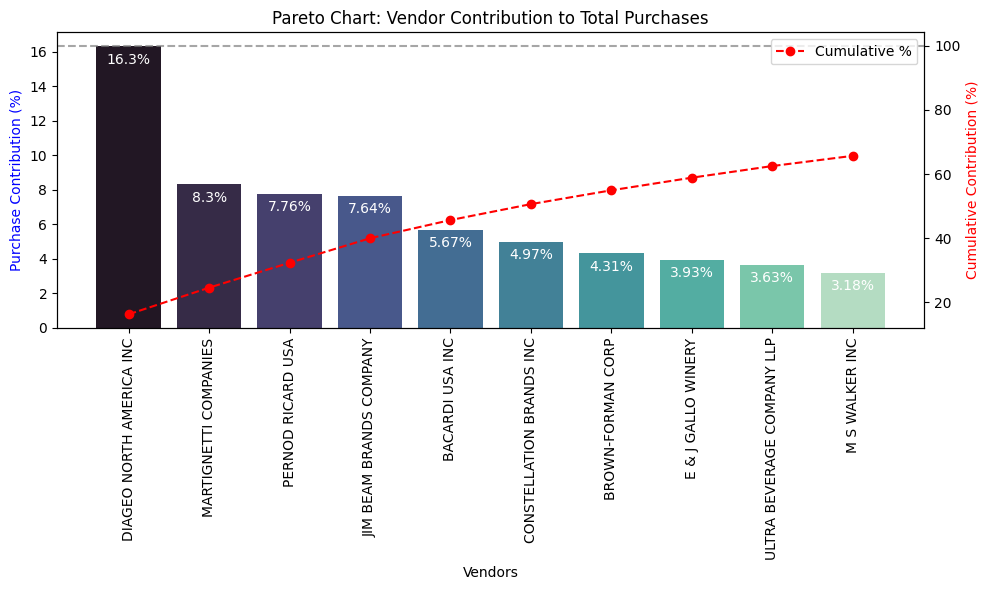

In [205]:
top_vendors['cumulativecontribution%'] = top_vendors['purchasecontribution%'].cumsum()

fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar plot for Purchase Contribution
sns.barplot(
    x=top_vendors['VendorName'],
    y=top_vendors['purchasecontribution%'],
    palette="mako",
    ax=ax1
)

# Add value labels on bars
for i, value in enumerate(top_vendors['purchasecontribution%']):
    ax1.text(
        i,
        value - 1,
        f"{value}%",
        ha='center',
        fontsize=10,
        color='white'
    )

# Line plot for Cumulative Contribution
ax2 = ax1.twinx()

ax2.plot(
    top_vendors['VendorName'],
    top_vendors['cumulativecontribution%'],
    color='red',
    marker='o',
    linestyle='dashed',
    label='Cumulative %'
)

# Axis labels
ax1.set_xlabel('Vendors')
ax1.set_ylabel('Purchase Contribution (%)', color='blue')
ax2.set_ylabel('Cumulative Contribution (%)', color='red')

# Rotate x labels
ax1.tick_params(axis='x', rotation=90)

# Title
ax1.set_title('Pareto Chart: Vendor Contribution to Total Purchases')

# 100% reference line
ax2.axhline(y=100, color='gray', linestyle='dashed', alpha=0.7)

ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()


### How much of total procurement is dependent on the top vendors?

In [206]:
print(f"Total purchase contribution of top 10 vendors is {round(top_vendors['purchasecontribution%'].sum(),2)}%")

Total purchase contribution of top 10 vendors is 65.69%


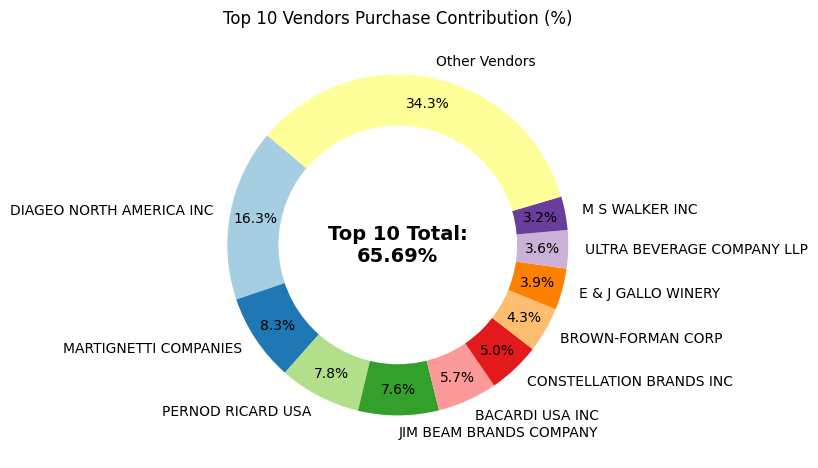

In [208]:
# Extract vendor names and purchase contributions
vendors = top_vendors['VendorName'].tolist()
purchase_contributions = top_vendors['purchasecontribution%'].tolist()

# Calculate total and remaining contribution
total_contribution = sum(purchase_contributions)
remaining_contribution = 100 - total_contribution

# Append "Other Vendors"
vendors.append("Other Vendors")
purchase_contributions.append(remaining_contribution)

# Create Donut Chart
fig, ax = plt.subplots(figsize=(8, 8))

wedges, texts, autotexts = ax.pie(purchase_contributions,labels=vendors,
    autopct='%1.1f%%',
    startangle=140,
    pctdistance=0.85,
    colors=plt.cm.Paired.colors
)

# Draw center white circle for donut effect
center_circle = plt.Circle((0, 0), 0.70, fc='white')
ax.add_artist(center_circle)

# Center text
ax.text(
    0, 0,
    f"Top 10 Total:\n{total_contribution:.2f}%",
    fontsize=14,
    fontweight='bold',
    ha='center',
    va='center'
)

# Title
ax.set_title("Top 10 Vendors Purchase Contribution (%)")

plt.tight_layout()
plt.show()


### Does purchasing in bulk reduce the unit price,and waht is the optimal purchase volume for cost savings?

In [209]:
 df['unitpurchaseprice'] = df['totalpurchasedollars']/df['totalpurchasequantity']

In [210]:
df['ordersize'] = pd.qcut(df["totalpurchasequantity"], q = 3, labels=["Small","Medium","Large"])

In [213]:
df['ordersize'] 

0       Large
1       Large
2       Large
3       Large
4       Large
        ...  
8559    Small
8560    Small
8561    Small
8562    Small
8563    Small
Name: ordersize, Length: 8564, dtype: category
Categories (3, object): ['Small' < 'Medium' < 'Large']

In [215]:
df.groupby('ordersize')[['unitpurchaseprice']].mean()

,unitpurchaseprice
ordersize,
Small,39.068186
Medium,15.486414
Large,10.777625


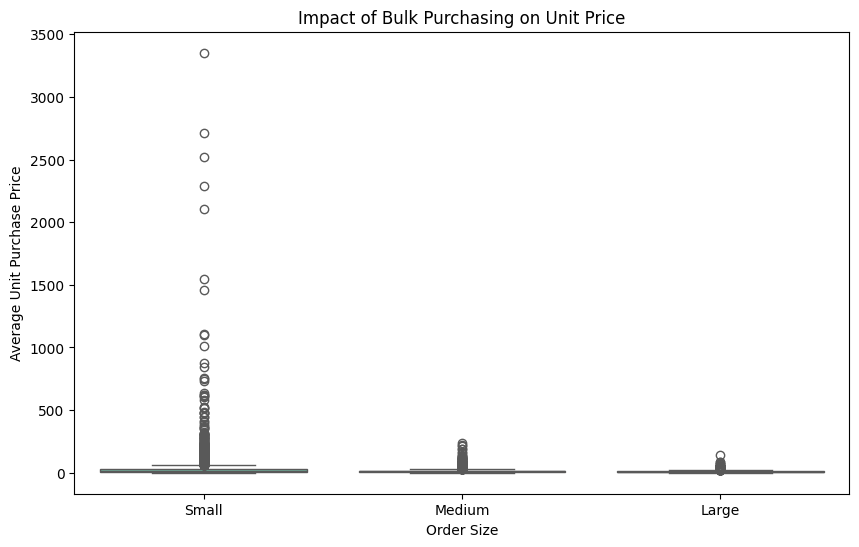

In [216]:
plt.figure(figsize=(10, 6))

sns.boxplot(data=df,x="ordersize",y="unitpurchaseprice",
    palette="Set2"
)

plt.title("Impact of Bulk Purchasing on Unit Price")
plt.xlabel("Order Size")
plt.ylabel("Average Unit Purchase Price")

plt.show()


### Which vendors have low inventory turnover,indicating excess stock and slow_moving products

In [224]:
df[df['StockTurnOver'] < 1].groupby('VendorName')['StockTurnOver'].mean().reset_index().sort_values('StockTurnOver',ascending=True).head(10)

,VendorName,StockTurnOver
0,ALISA CARR BEVERAGES,0.615385
36,HIGHLAND WINE MERCHANTS LLC,0.708333
60,PARK STREET IMPORTS LLC,0.751306
19,Circa Wines,0.755676
26,Dunn Wine Brokers,0.766022
15,CENTEUR IMPORTS LLC,0.773953
78,SMOKY QUARTZ DISTILLERY LLC,0.783835
90,TAMWORTH DISTILLING,0.797078
91,THE IMPORTED GRAPE LLC,0.807569
101,WALPOLE MTN VIEW WINERY,0.820548


### How much capital is lockedd in  unsold inventory per vendor, and which vendors contribute the most to it?

In [226]:
df["UnsoldInventoryValue"] = (
    (df["totalpurchasequantity"] - df["totalsalesquantity"])
    * df["PurchasePrice"]
)

print("Total Unsold Capital:", format_dollars(df["UnsoldInventoryValue"].sum()))


Total Unsold Capital: 2.71M


In [227]:
# Aggregate capital locked per vendor
inventory_value_per_vendor = df.groupby("VendorName")["UnsoldInventoryValue"].sum().reset_index()

# Sort vendors with highest locked capital
inventory_value_per_vendor = (inventory_value_per_vendor.sort_values(by="UnsoldInventoryValue", ascending=False)
)

# Format values for readability
inventory_value_per_vendor["UnsoldInventoryValue"] = (inventory_value_per_vendor["UnsoldInventoryValue"].apply(format_dollars))

inventory_value_per_vendor.head(10)

,VendorName,UnsoldInventoryValue
25,DIAGEO NORTH AMERICA INC,722.21K
46,JIM BEAM BRANDS COMPANY,554.67K
68,PERNOD RICARD USA,470.63K
116,WILLIAM GRANT & SONS INC,401.96K
30,E & J GALLO WINERY,228.28K
79,SAZERAC CO INC,198.44K
11,BROWN-FORMAN CORP,177.73K
20,CONSTELLATION BRANDS INC,133.62K
61,MOET HENNESSY USA INC,126.48K
77,REMY COINTREAU USA INC,118.60K


### what is the 95% confidence interval for profit margins of top_performing and low_performing vendors

In [230]:
top_threshold = df["totalsalesdollars"].quantile(0.75)
low_threshold = df["totalsalesdollars"].quantile(0.25)

In [233]:
top_vendors = (df[df["totalsalesdollars"] >= top_threshold]["ProfitMargin"].dropna())

low_vendors = (df[df["totalsalesdollars"] <= low_threshold]["ProfitMargin"].dropna())

In [234]:
top_vendors

0       25.297693
1       21.062810
2       24.675786
3       27.139908
4       28.412764
          ...    
3523    79.684817
3681    85.782102
4751    93.085860
4920    95.012530
5050    94.271857
Name: ProfitMargin, Length: 2141, dtype: float64

In [235]:
low_vendors

5631     4.111764
5652     6.145626
5701    12.007271
5704     1.677308
5724     7.239599
          ...    
8559    83.448276
8560    96.436186
8561    25.252525
8562    98.974037
8563    99.166079
Name: ProfitMargin, Length: 2141, dtype: float64

In [236]:
def confidence_interval(data, confidence=0.95):
    mean_val = np.mean(data)
    
    # Standard error of the mean
    std_err = np.std(data, ddof=1) / np.sqrt(len(data))
    
    # t critical value
    t_critical = stats.t.ppf((1 + confidence) / 2, df=len(data) - 1)
    
    margin_of_error = t_critical * std_err
    
    return mean_val, mean_val - margin_of_error, mean_val + margin_of_error


Top Vendors 95% CI: (30.74, 31.61), Mean: 31.18
Low Vendors 95% CI: (40.50, 42.64), Mean: 41.57


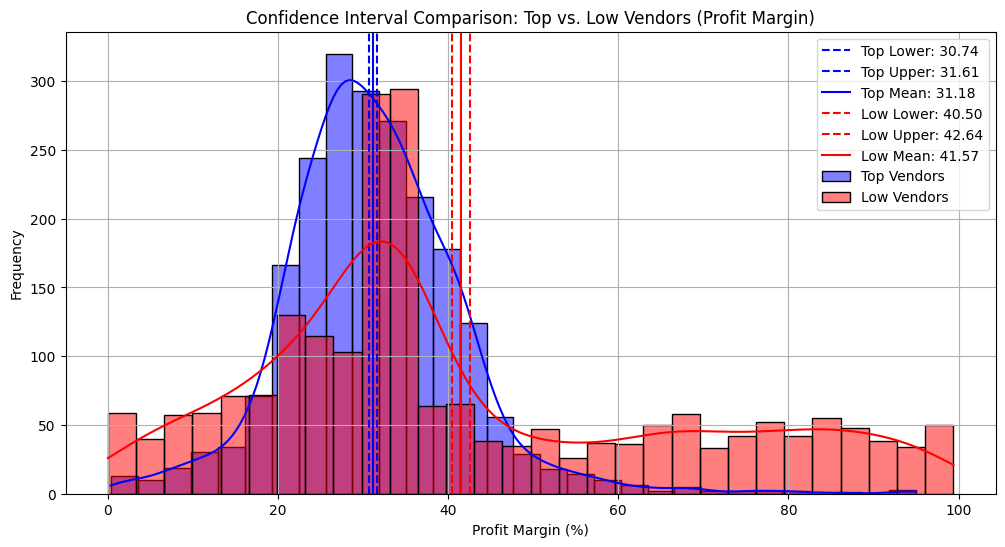

In [237]:
# Compute confidence intervals
top_mean, top_lower, top_upper = confidence_interval(top_vendors)
low_mean, low_lower, low_upper = confidence_interval(low_vendors)

print(f"Top Vendors 95% CI: ({top_lower:.2f}, {top_upper:.2f}), "f"Mean: {top_mean:.2f}")
print(f"Low Vendors 95% CI: ({low_lower:.2f}, {low_upper:.2f}), "f"Mean: {low_mean:.2f}")

# Create figure
plt.figure(figsize=(12, 6))

# Top vendors distribution
sns.histplot(top_vendors,kde=True,bins=30,color="blue",alpha=0.5,label="Top Vendors")

plt.axvline(top_lower, color="blue", linestyle="--", label=f"Top Lower: {top_lower:.2f}")
plt.axvline(top_upper, color="blue", linestyle="--", label=f"Top Upper: {top_upper:.2f}")
plt.axvline(top_mean,  color="blue", linestyle="-",  label=f"Top Mean: {top_mean:.2f}")

# Low vendors distribution
sns.histplot(low_vendors,kde=True,bins=30,color="red",alpha=0.5,label="Low Vendors")

plt.axvline(low_lower, color="red", linestyle="--", label=f"Low Lower: {low_lower:.2f}")
plt.axvline(low_upper, color="red", linestyle="--", label=f"Low Upper: {low_upper:.2f}")
plt.axvline(low_mean,  color="red", linestyle="-",  label=f"Low Mean: {low_mean:.2f}")

# Finalize plot
plt.title("Confidence Interval Comparison: Top vs. Low Vendors (Profit Margin)")
plt.xlabel("Profit Margin (%)")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)

plt.show()


#### The confidence interval for low-performing vendors (40.48% to 42.62%) is notably higher than that of top-performing vendors (30.74% to 31.61%).

#### This indicates that vendors with lower sales volumes often maintain higher profit margins, possibly due to premium pricing or leaner operating costs.

#### For top-performing vendors: To improve profitability, they can focus on selective price adjustments, cost optimization, or smarter bundling strategies.

#### For low-performing vendors: Despite strong margins, lower sales volumes suggest a need for better marketing, more competitive pricing, or improved distribution to drive growth.

### Is there a significant difference in profit margins between top-performing and low-performing vendors?

### Hypotheses:

#### H₀ (Null Hypothesis): There is no significant difference in the mean profit margins of top-performing and low-performing vendors.

#### H₁ (Alternative Hypothesis): There is a significant difference in the mean profit margins of top-performing and low-performing vendors.

In [239]:
# Define sales thresholds
top_threshold = df["totalsalesdollars"].quantile(0.75)
low_threshold = df["totalsalesdollars"].quantile(0.25)

# Split vendors by performance
top_vendors = (df.loc[df["totalsalesdollars"] >= top_threshold, "ProfitMargin"]
      .dropna()
)

low_vendors = (df.loc[df["totalsalesdollars"] <= low_threshold, "ProfitMargin"]
      .dropna())

# Perform two-sample t-test (Welch’s t-test)
t_stat, p_value = ttest_ind(top_vendors,low_vendors,equal_var=False)

# Print results
print(f"T-Statistic: {t_stat:.4f}, P-Value: {p_value:.4f}")

if p_value < 0.05:
    print("Reject H₀: There is a significant difference in profit margins "
    "between top- and low-performing vendors.")
else:
    print( "Fail to reject H₀: No significant difference in profit margins.")


T-Statistic: -17.6695, P-Value: 0.0000
Reject H₀: There is a significant difference in profit margins between top- and low-performing vendors.
